In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import RobustScaler
import seaborn as sb
import pandas as pd
from replaceNA import *

In [2]:
df = pd.read_csv('WeatherSydney.csv', sep = ';', index_col = "Date")
df.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm
Date,,,,,,,,,
01.02.2008,Sydney,15.6,NaN,NaN,20.0,84.0,1017.4,8.0,20.9
02.02.2008,Sydney,6.0,NaN,NaN,13.0,73.0,1016.4,7.0,24.8
03.02.2008,Sydney,6.6,NaN,NaN,2.0,86.0,1015.6,8.0,23.0
04.02.2008,Sydney,18.8,NaN,NaN,20.0,90.0,1011.8,8.0,20.9
05.02.2008,Sydney,77.4,NaN,NaN,6.0,74.0,1004.8,8.0,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3337 entries, 01.02.2008 to 25.06.2017
Data columns (total 9 columns):
Location         3337 non-null object
Rainfall         3331 non-null float64
WindGustDir      2301 non-null object
WindGustSpeed    2301 non-null float64
WindSpeed3pm     3312 non-null float64
Humidity3pm      3324 non-null float64
Pressure3pm      3318 non-null float64
Cloud3pm         2776 non-null float64
Temp3pm          3333 non-null float64
dtypes: float64(7), object(2)
memory usage: 260.7+ KB


In [4]:
df = df.drop(columns = ['WindGustDir', 'WindGustSpeed'])

In [5]:
df = df.drop(columns = ['Location'])

In [6]:
df.head()

,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm
Date,,,,,,
01.02.2008,15.6,20.0,84.0,1017.4,8.0,20.9
02.02.2008,6.0,13.0,73.0,1016.4,7.0,24.8
03.02.2008,6.6,2.0,86.0,1015.6,8.0,23.0
04.02.2008,18.8,20.0,90.0,1011.8,8.0,20.9
05.02.2008,77.4,6.0,74.0,1004.8,8.0,25.5


In [6]:
df['Location'].value_counts()

Sydney    3337
Name: Location, dtype: int64

In [7]:
df.describe()

,Rainfall,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm
count,3331.000000,3312.000000,3324.000000,3318.000000,2776.000000,3333.000000
mean,3.330231,19.335447,54.699158,1016.018774,4.218660,21.533333
std,9.895172,7.482554,16.293530,7.032211,2.641885,4.303737
min,0.000000,0.000000,10.000000,989.800000,0.000000,10.200000
25%,0.000000,15.000000,44.000000,1011.300000,1.000000,18.400000
50%,0.000000,19.000000,56.000000,1016.300000,4.000000,21.300000
75%,1.400000,24.000000,65.000000,1020.800000,7.000000,24.500000
max,119.400000,57.000000,99.000000,1036.700000,8.000000,44.700000


In [8]:
df = df.dropna()

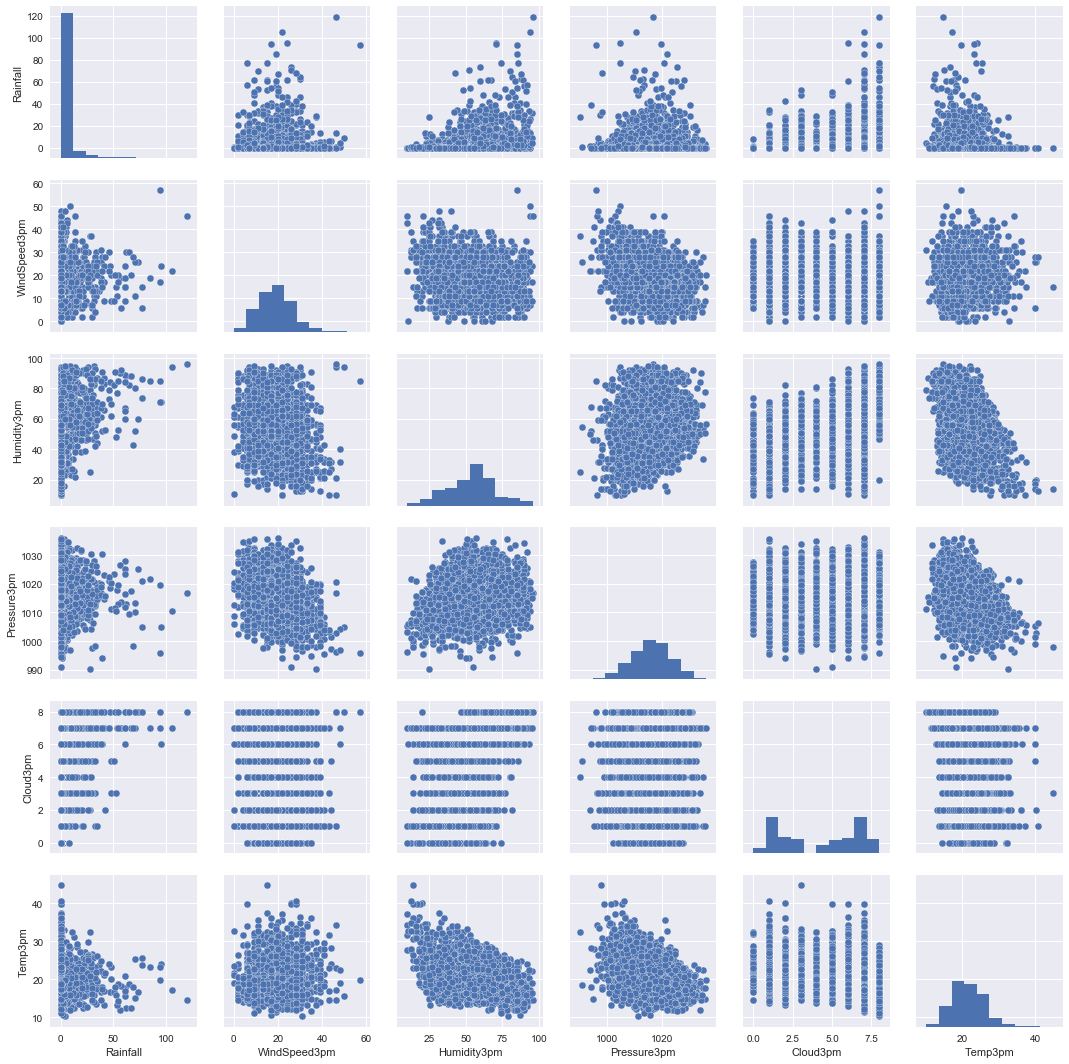

In [51]:
sb.set(style= 'darkgrid', context = 'notebook')
sb.pairplot(df, size=2.5)
plt.show()

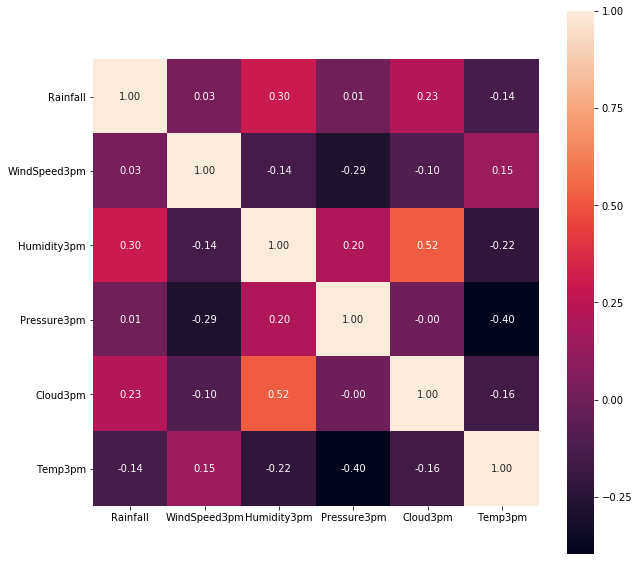

In [10]:
def plot_correlation(data, columns):
    cm = np.corrcoef(data.T)
    plt.figure(figsize=(10,10))
    heatmap = sb.heatmap(cm, cbar=True, annot=True, square=True,
                         fmt='.2f', annot_kws={'size':10}, xticklabels=columns, yticklabels=columns)
    
plot_correlation(df, df.columns)

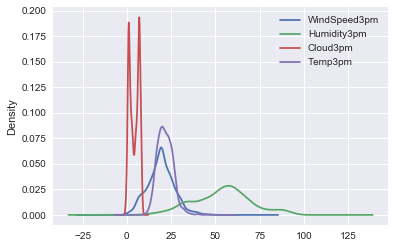

In [59]:
df.iloc[:, [1,2,4,5]].plot.density()

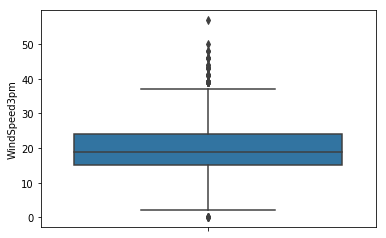

In [27]:
sb.boxplot(y = df['WindSpeed3pm'])

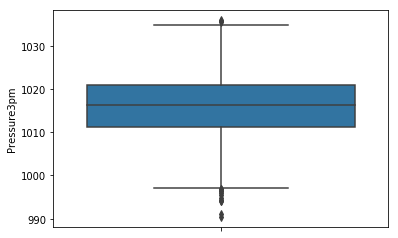

In [24]:
sb.boxplot(y = df['Pressure3pm'])

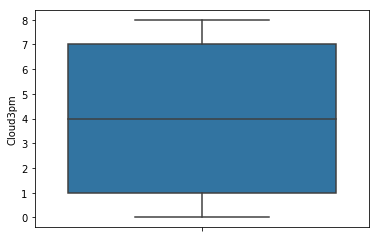

In [26]:
sb.boxplot(y = df['Cloud3pm'])

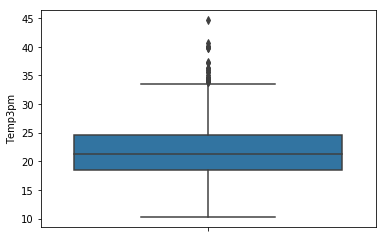

In [28]:
sb.boxplot(y = df['Temp3pm'])

In [33]:
X = df.values[:, :-1]
# select the last column and assign it to variable y
y = df.values[:, -1]

In [34]:
rs = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))
# scale X data with the scaler and assign its value to X_scaled
X_scaled = rs.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, shuffle=True, random_state=42)

In [39]:
# get R^2 score of given model on given data
def test_model_r2(model, X_train, X_test, y_train, y_test):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

In [40]:
from sklearn.linear_model import LinearRegression

# use LinearRegression class to test on your data
# create LinearRegression class instance
lin_reg = LinearRegression()
# get r_squared score
r2 = test_model_r2(lin_reg, X_train, X_test, y_train, y_test)
# print the score
print(r2)

0.19713471469855448


In [41]:
from sklearn.linear_model import ElasticNet

# use ElasticNet class to test on your data
# create ElasticNet class instance
enet = ElasticNet(alpha=0.0001, l1_ratio=0.1)
# get r_squared score
r2 = test_model_r2(enet, X_train, X_test, y_train, y_test)
# print the score
print(r2)

0.19713567500231743


In [43]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(alpha=0.00001, max_iter=10000, tol=0.0001, shuffle=True, random_state=333)
# get r_squared score
r2 = test_model_r2(sgd_reg, X_train, X_test, y_train, y_test)
# print the score
print(r2)

0.1142232288461218
